In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os


In [2]:
# path = "/home/gayane/BartLM/fairseq/scripts/u_map_files/[0]embeddings-100-0.99.pt"
# df = torch.load(path)

In [3]:
# df.shape

NameError: name 'df' is not defined

In [ ]:
# path = "/home/gayane/BartLM/fairseq/scripts/u_map_files/embeddings-100-0.99/archive/data.pkl"
# df = pd.read_pickle(path)

In [ ]:
df

array([[-1.0670958 , -2.56634   ],
       [ 2.1684747 ,  0.18654625],
       [-0.15592791,  6.545653  ],
       ...,
       [-4.1209474 ,  4.1577907 ],
       [-1.4737933 ,  1.077373  ],
       [-1.4747684 ,  2.794688  ]], dtype=float32)

/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


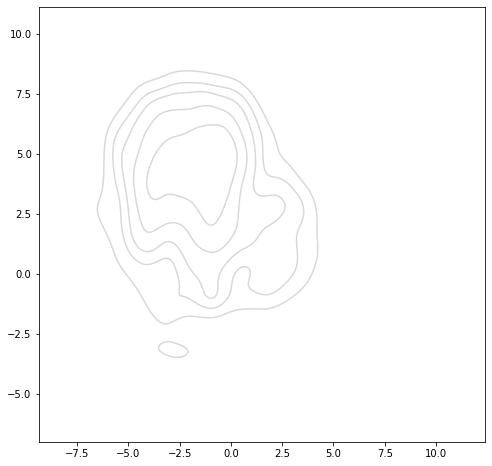

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(df[:, 0], df[:, 1], color="grey", alpha=0.3, thresh=.2, levels=6)
plt.show()

/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


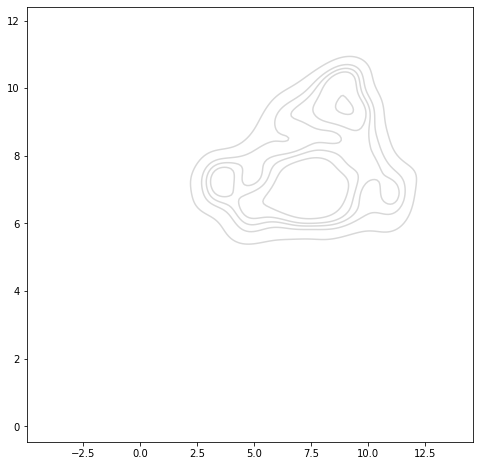

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.kdeplot(df[:, 0], df[:, 1], color="grey", alpha=0.3, thresh=.2, levels=6)
plt.show()

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os

In [11]:
np_filename = '/mnt/good/gayane/data/data_load_folder/BBBP_clintox_Tox21_SIDER_Genotoxicity_esol_ZINC/np_pretrainedTrue_489740_umap_40_0.4.npy'
df_filename = '/mnt/good/gayane/data/data_load_folder/BBBP_clintox_Tox21_SIDER_Genotoxicity_esol_ZINC/df_pretrainedTrue_489740_umap_40_0.4.csv'

In [9]:
X = np.load(np_filename)
df = pd.read_csv(df_filename)
in_ = [(2039, 3517), (4995, 6422), (3517, 4995), (6422, 7063)]

In [10]:
X = np.load(np_filename)
df = pd.read_csv(df_filename)
BBBP_x = X[: 2039]
clintox_x = X[2039 : 3517]
Tox21_x = X[3517 : 4995]
SIDER_x = X[3517 : 4995]
MN_x = X[:2039]
esol_x = X[:2039]

(489740, 2)

In [12]:
X.shape

(489740, 2)

ZINC


/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

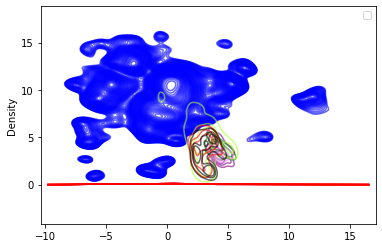

In [17]:
pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

# log_save_dir = Path(f"./umap-graph-all{pretr}/")
# log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [100] # [10, 40, 80, 100]
min_dists = [0.8] # [0.4, 0.6, 0.8, 1]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

# color = ["black", "purple"] #, "green", "gray", "pink", "blue"]

color = ["blue", "purple", "green", "greenyellow", "violet", "red",  "black"]

leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))
dataset_name_list = ["ZINC", "BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol"] 
# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196]
in_ = [(13416, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]

# fig, ax = plt.subplots(figsize=(8,8))
np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X = np.load(np_filename)
df_ = pd.read_csv(df_filename) 
# for n_neighbor in n_neighbors:
#     for min_dist in min_dists:
for i, data_name in enumerate(dataset_name_list):
#             np_filename = f'{path}/np_{data_name}_pretrainedTrue.npy'
#             df_filename = f'{path}/df_{data_name}_pretrainedTrue.csv'
#             print(data_name)
#             X_data = np.load(np_filename)
#             df_data = pd.read_csv(df_filename)

#             Zinc = len(X_data.shape) == 3
#             n = X_data.shape[0]
#             tp = ["train"]*n if Zinc else None
#             tr = np.zeros(n) if Zinc else None
#             X_data, df_data["target"], df_data["level_0"] = X_data.reshape(n, 1024), tr, tp if Zinc else X_data

#             print(X_data.shape, X.shape)
#             X = np.concatenate((X, X_data))
#             df_ = pd.concat([df_, df_data])
#         print(f"---------- neighbor:  {n_neighbor}, minimum distance: {min_dist} ----------")
#         reducer = umap.UMAP(
#             n_components=2, min_dist=min_dist, n_neighbors=n_neighbor, transform_seed=5, verbose=False
#         ).fit(X)
        
#         X_umap_ = reducer.transform(X)
#         data = {
#                 "x": X_umap_[:, 0].tolist(),
#                 "y": X_umap_[:, 1].tolist(),
#                 "label": df_["target"].values,
#                 "split": df_["level_0"].values,

#             }
#         df_ = pd.DataFrame(data=data)

#         np_filename = f'{path}/np_{data_name}_pretrainedTrue_umap_{n_neighbor}_{min_dist}.npy'
#         df_filename = f'{path}/df_{data_name}_pretrainedTrue_umap_{n_neighbor}_{min_dist}.csv'
#         print(f"Saving to {df_filename}")
#         df_.to_csv(df_filename)
#         print(f"Saving to {np_filename}")
#         np.save(file=np_filename, arr=X_umap_)
    # for i, data_name in enumerate(dataset_name_list):
    if data_name == "ZINC":

        ax = sns.kdeplot(df_["x"].values[in_[i][0] : ], df_["y"].values[in_[i][0] : ], alpha=0.6, thresh=.2, levels=80, label=f"{data_name}", color=color[i])
    else:
        ax = sns.kdeplot(df_["x"].values[in_[i][0] : in_[i][1]], df_["y"].values[in_[i][0] : in_[i][1]], alpha=0.6, thresh=.2, levels=4, label=f"{data_name}", color=color[i])
    # ax = sns.kdeplot(df[df["label"] ==1]["x"].values, df[df["label"] ==1]["y"].values,  alpha=0.6, thresh=.2, levels=6, label=f"{data_name}_1")
    ax = sns.distplot(df_[df_["label"] ==0]["x"].values, df_[df_["label"] ==0]["y"].values, kde=True, hist=False, color="r")

handles = [mpatches.Patch(facecolor=color[i], label=dataset_name_list[i]) for i in range(len(dataset_name_list))]
plt.legend(handles=handles)    # leg.append(f"{data_name}_1")
plt.legend(leg)
plt.show()


ZINC


/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/gayane/miniconda3/envs/rktoxo/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explici

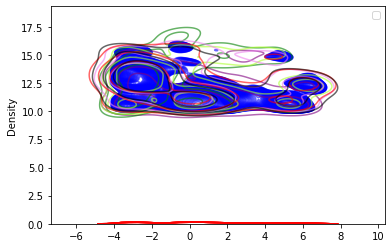

In [16]:
pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

# log_save_dir = Path(f"./umap-graph-all{pretr}/")
# log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [100] # [10, 40, 80, 100]
min_dists = [0.8] # [0.4, 0.6, 0.8, 1]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

# color = ["black", "purple"] #, "green", "gray", "pink", "blue"]

color = ["blue", "purple", "green", "greenyellow", "violet", "red",  "black"]

leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))
dataset_name_list = ["ZINC", "BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol"] 
# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196]
in_ = [(13416, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]

# fig, ax = plt.subplots(figsize=(8,8))
np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X = np.load(np_filename)
df_ = pd.read_csv(df_filename) 
# for n_neighbor in n_neighbors:
#     for min_dist in min_dists:
for i, data_name in enumerate(dataset_name_list):
#             np_filename = f'{path}/np_{data_name}_pretrainedTrue.npy'
#             df_filename = f'{path}/df_{data_name}_pretrainedTrue.csv'
#             print(data_name)
#             X_data = np.load(np_filename)
#             df_data = pd.read_csv(df_filename)

#             Zinc = len(X_data.shape) == 3
#             n = X_data.shape[0]
#             tp = ["train"]*n if Zinc else None
#             tr = np.zeros(n) if Zinc else None
#             X_data, df_data["target"], df_data["level_0"] = X_data.reshape(n, 1024), tr, tp if Zinc else X_data

#             print(X_data.shape, X.shape)
#             X = np.concatenate((X, X_data))
#             df_ = pd.concat([df_, df_data])
#         print(f"---------- neighbor:  {n_neighbor}, minimum distance: {min_dist} ----------")
#         reducer = umap.UMAP(
#             n_components=2, min_dist=min_dist, n_neighbors=n_neighbor, transform_seed=5, verbose=False
#         ).fit(X)
        
#         X_umap_ = reducer.transform(X)
#         data = {
#                 "x": X_umap_[:, 0].tolist(),
#                 "y": X_umap_[:, 1].tolist(),
#                 "label": df_["target"].values,
#                 "split": df_["level_0"].values,

#             }
#         df_ = pd.DataFrame(data=data)

#         np_filename = f'{path}/np_{data_name}_pretrainedTrue_umap_{n_neighbor}_{min_dist}.npy'
#         df_filename = f'{path}/df_{data_name}_pretrainedTrue_umap_{n_neighbor}_{min_dist}.csv'
#         print(f"Saving to {df_filename}")
#         df_.to_csv(df_filename)
#         print(f"Saving to {np_filename}")
#         np.save(file=np_filename, arr=X_umap_)
    # for i, data_name in enumerate(dataset_name_list):
    X_filter = X[(X[:,0] >= -4) & (X[:,0] <= 7) & (X[:,1] >= 8.5)]
    df_filter = df[(X[:,0] >= -4) & (X[:,0] <= 7) & (X[:,1] >= 8.5)]
    if data_name == "ZINC":

        ax = sns.kdeplot(df_filter["x"].values[in_[i][0] : ], df_filter["y"].values[in_[i][0] : ], alpha=0.6, thresh=.2, levels=120, label=f"{data_name}", color=color[i])
    else:
        ax = sns.kdeplot(df_filter["x"].values[in_[i][0] : in_[i][1]], df_filter["y"].values[in_[i][0] : in_[i][1]], alpha=0.6, thresh=.2, levels=4, label=f"{data_name}", color=color[i])
    # ax = sns.kdeplot(df[df["label"] ==1]["x"].values, df[df["label"] ==1]["y"].values,  alpha=0.6, thresh=.2, levels=6, label=f"{data_name}_1")
    ax = sns.distplot(df_filter[df_filter["label"] ==0]["x"].values, df_filter[df_filter["label"] ==0]["y"].values, kde=True, hist=False, color="r")

handles = [mpatches.Patch(facecolor=color[i], label=dataset_name_list[i]) for i in range(len(dataset_name_list))]
plt.legend(handles=handles)    # leg.append(f"{data_name}_1")
plt.legend(leg)
plt.show()


In [58]:
data = {
                    "x": X_umap_[:, 0].tolist(),
                    "y": X_umap_[:, 1].tolist(),
                    "label": df["target"].tolist(),
                    "split": df["level_0"].tolist(),

                }

In [77]:
len(data["x"]), data.keys(), X_data.shape

(3552, dict_keys(['x', 'y', 'label', 'split']), (24948, 1, 1024))

In [59]:
len(data["label"]), len(df["target"]), len(df_.SMILES)

(1478, 1478, 1513)

In [66]:
df_

,x,y,label,split
0,3.127506,13.054391,1,train
1,1.057910,15.607585,1,train
2,1.084553,15.835610,1,train
3,2.805416,14.474736,1,train
4,2.702686,14.510690,1,train
...,...,...,...,...
3547,3.018986,12.462984,1,test
3548,4.042947,9.074398,1,test
3549,4.773540,9.577384,1,test
3550,5.489856,6.606085,1,test


In [45]:
X_umap_.shape

(1427, 2)

In [44]:
data_name

'SIDER_0'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as  mpatches

from itertools import chain
from pathlib import Path
import seaborn as sns
import pandas as pd 
import numpy as np
import torch
import json
import umap
import os


pretrained_model = True
pretr = "-pretrained" if pretrained_model else ""
path = "/mnt/good/gayane/data/data_load_folder"

log_save_dir = Path(f"./umap-graph-all{pretr}/")
log_save_dir.mkdir(parents=True, exist_ok=True)
n_neighbors = [40]
min_dists = [0.4]
# tar = [0 if i[0].item() == 5 else 1 for i in targets]


# col_train = ["orange" if i==1 else "pink" for i in df[df['level_0']=="train"].target.to_list()]
# col_valid = ["darkred" if i==1 else "dimgrey" for i in df[df['level_0']=="valid"].target.to_list()]
# col_test = ["green" if i==1 else "darkblue" for i in df[df['level_0']=="test"].target.to_list()]

color = ["blue", "purple", "green", "greenyellow", "violet", "red",  "black"]


leg = []
# col = list(chain.from_iterable([col_train, col_valid, col_test]))
dataset_name_list = ["BBBP", "clintox", "Tox21", "SIDER", "Genotoxicity", "esol","ZINC"] 
# dataset_len = [475196, 2039, 1478, 1478, 1427, 641]
# in_ = [(7063, 482259), (0, 2039), (2039, 3517), (3517, 4995), (4995, 6422), (6422, 7063)]

dataset_len = [2039, 1478, 7831, 1427, 641, 1128, 475196]
in_ = [(14544, 489740), (0, 2039), (2039, 3517), (3517, 11348), (11348, 12775), (12775, 13416), (13416, 14544)]


# dataset_len = [475196, 2039, 1478, 7831, 1427, 641]
# in_ = [(0, 475196), (475196, 477235), (477235, 478713), (478713, 486544), (486544, 487971), (487971, 488612)]

np_filename = f'{path}/np_{dataset_name_list[0]}_pretrainedTrue.npy'
df_filename = f'{path}/df_{dataset_name_list[0]}_pretrainedTrue.csv'
print(dataset_name_list[0])
X_ = np.load(np_filename)
df_0 = pd.read_csv(df_filename) 
dir_name = '_'.join(dataset_name_list)
os.system(f"mkdir -p {path}/{dir_name}")
data_len = 489740
for n_neighbor in n_neighbors:
    for min_dist in min_dists:

        np_filename = f'{path}/{dir_name}/np_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.npy'
        df_filename = f'{path}/{dir_name}/df_pretrainedTrue_{data_len}_umap_{n_neighbor}_{min_dist}.csv'
        filename = ""
        for i, data_name in enumerate(dataset_name_list):
            df_data = pd.DataFrame()
            filename = filename + f"_{data_name}"
            if i == 0: 
                X = X_
                df_ = df_0
            else:
                print("Create umap matrix part")

                np_filename_ = f'{path}/np_{data_name}_pretrainedTrue.npy'
                df_filename_ = f'{path}/df_{data_name}_pretrainedTrue.csv'
                print(data_name)
                X_data = np.load(np_filename_)
                if os.path.exists(df_filename_):
                    df_data = pd.read_csv(df_filename_)

                Zinc = data_name == "ZINC"
                n = X_data.shape[0]
                tp = ["train"]*n if Zinc else None
                tr = np.zeros(n) if Zinc else None
                X_data = X_data.reshape(n, 1024) if Zinc else X_data
                df_data["target"] = tr if Zinc else df_data["target"]
                df_data["level_0"] = tp if Zinc else df_data["level_0"]

                print(X_data.shape, X.shape)
                X = np.concatenate((X, X_data))
                df_ = pd.concat([df_, df_data], ignore_index=True, sort=False)

                if data_name == "ZINC":
                    df_data.to_csv(f'{path}/df_{data_name}_pretrainedTrue.csv')

BBBP
Create umap matrix part
clintox
(1478, 1024) (2039, 1024)
Create umap matrix part
Tox21
(7831, 1024) (3517, 1024)
Create umap matrix part
SIDER
(1427, 1024) (11348, 1024)
Create umap matrix part
Genotoxicity
(641, 1024) (12775, 1024)
Create umap matrix part
esol
(1128, 1024) (13416, 1024)
Create umap matrix part
ZINC
(475196, 1024) (14544, 1024)


In [ ]:
dataset_name_list__ = ["ZINC", "HIV", "Tox21", "lipo", "BBBP", "clintox", "SIDER", "Genotoxicity", "esol"] 

in_ = [(14544, 489740), (493940, 535067), (3517, 11348), (489740, 493940), (0, 2039), (2039, 3517), (11348, 12775), (12775, 13416), (13416, 14544)]


In [26]:
np_filename = '/mnt/good/gayane/data/data_load_folder/np_HIV_pretrainedTrue.npy'
df_filename = '/mnt/good/gayane/data/data_load_folder/BBBP_clintox_Tox21_SIDER_Genotoxicity_esol_ZINC_lipo_HIV/df_pretrainedTrue_535067_umap_40_0.4.csv'

In [27]:
X = np.load(np_filename)
# df = pd.read_csv(df_filename)
# BBBP_x = X[: 2039]
# clintox_x = X[2039 : 3517]
# Tox21_x = X[3517 : 11348]
# SIDER_x = X[11348 : 12775]
# MN_x = X [12775 : 13416]
# lipo_x = X[489740 : 493940]
# esol_x = X[13416 : 14544]
# HIV_x = X[493940 : 535067]

In [25]:
BBBP_x[:,1].min(), clintox_x[:,1].min(), Tox21_x[:,1].min(), SIDER_x[:,1].min(), MN_x[:,1].min(), lipo_x[:,1].min(), esol_x[:,1].min(), HIV_x[:,1].min()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [28]:
X.shape

(41127, 1024)

In [9]:
zinc250 = pd.read_csv("/home/gayane/BartLM/fairseq/scripts/250k_rndm_zinc_drugs_clean_3.csv")

In [15]:
zinc250["sm"] = zinc250["smiles"]

In [17]:
zinc250["sm"] = zinc250["smiles"].str.split(r'\n').str.get(0)
zinc250

,smiles,logP,qed,SAS,sm
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1\n,5.05060,0.702012,2.084095,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1\n,3.11370,0.928975,3.432004,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,4.96778,0.599682,2.470633,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,4.00022,0.690944,2.822753,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,3.60956,0.789027,4.035182,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...
...,...,...,...,...,...
249450,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc...,3.36790,0.745901,2.900726,CC1(C)CC[C@H](CNC(=O)Cn2ncc3ccccc3c2=O)c2ccccc21
249451,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...,2.87430,0.799426,2.326627,Cn1ccnc1C(=O)c1ccc(NC(=O)C2CCN(C(=O)C(C)(C)C)C...
249452,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1\n,2.90054,0.878086,1.840642,Cc1ccc(NC(=O)C(=O)N(C)Cc2ccccc2)c(C)c1
249453,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1\n,2.55624,0.852917,2.024638,Cc1cc(C(=O)Nc2ccc(OCC(N)=O)cc2)c(C)n1C1CC1


In [3]:
uspto = pd.read_csv("USPTO_50K.csv")

In [4]:
uspto

,id,class,reactions
0,US05849732,6,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...
1,US20120114765A1,2,Nc1cccc2cnccc12.O=C(O)c1cc([N+](=O)[O-])c(Sc2c...
2,US08003648B2,1,CCNCC.Cc1nc(-c2ccc(C=O)cc2)sc1COc1ccc([C@H](CC...
3,US09045475B2,1,CC1(C)CCC(CN2CCN(c3ccc(C(=O)NS(=O)(=O)c4ccc(NC...
4,US08188098B2,2,CCOc1ccc(Oc2ncnc3c2cnn3C2CCNCC2)c(F)c1.O=C(Cl)...
...,...,...,...
50011,US20140194411A1,9,CCOC(=O)N1CCc2ccc3c(c2CC1)C(O)(C1CC1)CC3>>CCOC...
50012,US20090149445A1,9,Brc1cccc(C=C2c3ccccc3CCc3ccccc32)c1.N#C[Cu]>>N...
50013,US08710243B2,9,Cc1noc(C)c1-c1c(-c2ccc(O)cc2)c2ccccc2n1C=O.NO>...
50014,US20130303532A1,9,O=C(NC1CC1)c1ccc(-c2cnc3c(NCCCO)nc(Br)cn23)cc1...


In [12]:
smiles_reaction = uspto["reactions"]

In [13]:
smiles_list = [react.split(">") for react in smiles_reaction ]

['COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(OC)cc(C(C)(C)C)c1O',
 '',
 'COC(=O)[C@H](CCCCN)NC(=O)Nc1cc(OC)cc(C(C)(C)C)c1O']

In [19]:
smiles_list[:, 0]

TypeError: list indices must be integers or slices, not tuple

In [20]:
in_react = [i[0] for i in smiles_list]
out_react = [o[2] for o in smiles_list]

In [22]:
type(in_react), len(in_react), type(out_react), len(out_react)

(list, 50016, list, 50016)